In [5]:
import sys
import numpy as np
from keras.models import model_from_json
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt #for plotting
import os


In [6]:

def load(path):
    f = np.load(path)
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)

def buildModel(modelPath):
    modelFile = open(modelPath, 'r')
    model = modelFile.read()
    modelFile.close()
    model = model_from_json(model)
    return model

model = buildModel('../models/simple_dnn.json')
model.load_weights("../models/simple_dnn.h5")
(x_train, y_train), _ = load('/home/mhj/.keras/datasets/mnist.npz')
_, (x_test, y_test) = load('/home/mhj/.keras/datasets/preprocessing_minist.npz')

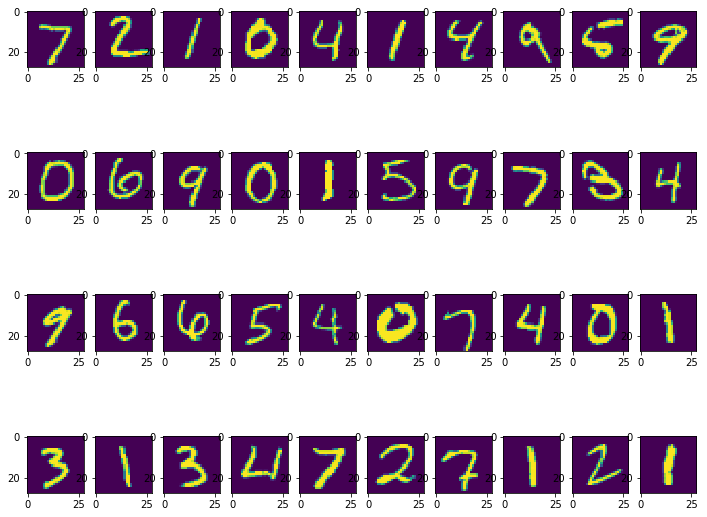

In [7]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_test[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [8]:
for i in range(4):
    print([np.argmax(res) for res in model.predict(x_test[i * 10 : (i + 1) * 10])])

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
[0, 6, 9, 0, 1, 5, 9, 7, 3, 4]
[9, 6, 6, 5, 4, 0, 7, 4, 0, 1]
[3, 1, 3, 4, 7, 2, 7, 1, 2, 1]
